# GokuNEmu

This notebook demonstrates how to use **GokuNEmu**, a neural network-based emulator to predict the nonlinear **matter power spectrum**. 

## 1 Import modules

In [1]:
from gokunemu import MatterPowerEmulator
import matplotlib.pyplot as plt
import numpy as np

## 2 Load the model

In [2]:
emu = MatterPowerEmulator()

## 3 Generate the matter power spectrum

There are two ways of making predictions:

### 3.1 Predicting P(k,z) for a Single Cosmology

This method computes the **matter power spectrum** for a **single** cosmological model.

In [3]:
# desired redshifts 
zs = [0, 0.2, 0.5, 0.6, 1, 1.5, 2, 3]

# specify the cosmological parameters and predict the matter power spectrum
k, Pk = emu.predict(Om=0.264, Ob=0.047, hubble=0.73, As=1.8e-9, ns=0.99, w0=-1.11, wa=0.27999999999999997, mnu=0.0825, Neff=3.55, alphas=-0.01685, redshifts=zs)

### 3.3 Predicting P(k) for Multiple Cosmologies

This method allows predicting **multiple** cosmological models at once

In [4]:
# Omega_m Omega_b hubble scalar_amp ns w0 wa mnu Neff alphas
cosmo_params = np.array([ 2.491600e-01,  4.253000e-02,  6.280533e-01,  2.990667e-09,
         9.150000e-01, -6.479667e-01, -6.876667e-01,  4.940000e-01,
         4.139667e+00, -2.000000e-04])
cosmo_params1 = np.array([ 3.106000e-01,  4.611000e-02,  6.677333e-01,  1.054667e-09,
         1.076600e+00, -8.505000e-01, -1.924333e+00,  3.868000e-01,
         2.247533e+00,  1.940000e-02])
cosmo_params2 = np.array([ 3.619600e-01,  5.041000e-02,  7.133867e-01,  1.841333e-09,
         8.010000e-01,  8.363333e-02, -6.456667e-01,  7.960000e-02,
         3.057133e+00, -3.313333e-02])

cosmo_set = np.array([cosmo_params, cosmo_params1,cosmo_params2])
k, Pk_set = emu.predict(cosmo_set, redshifts=zs)

## Visualizing the Matter Power Spectrum

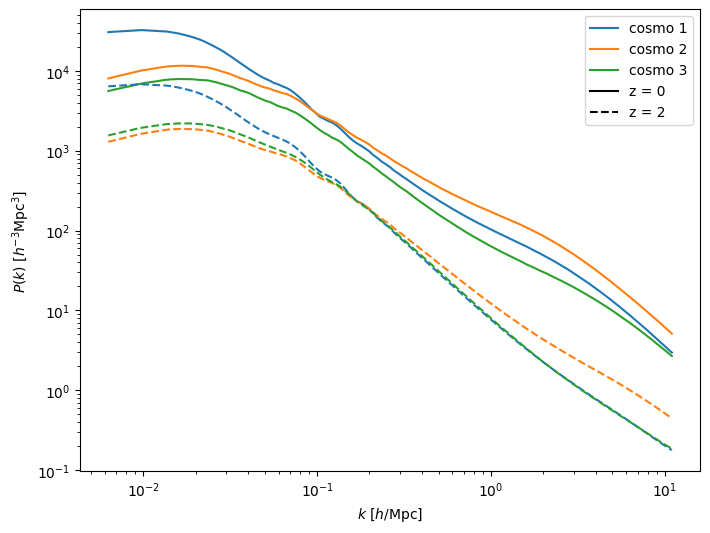

In [5]:
color_list = ['C0', 'C1', 'C2']
# plot z = 0 and 2
plt.figure(figsize=(8, 6))
# z = 0
i_z0 = 0
plt.plot(k, Pk_set[0][i_z0], label="cosmo 1", color=color_list[0])
plt.plot(k, Pk_set[1][i_z0], label="cosmo 2", color=color_list[1])
plt.plot(k, Pk_set[2][i_z0], label="cosmo 3", color=color_list[2])
# z = 2
i_z2 = 6
plt.plot(k, Pk_set[0][i_z2], linestyle='--', color=color_list[0])
plt.plot(k, Pk_set[1][i_z2], linestyle='--', color=color_list[1])
plt.plot(k, Pk_set[2][i_z2], linestyle='--', color=color_list[2])

# dummy plot for linestyles
plt.plot([], [], label="z = 0", color='black')
plt.plot([], [], linestyle='--', label="z = 2", color='black')
# plt.plot(k, Pk_true_interp, label="true")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$k$ [$h$/Mpc]")
plt.ylabel(r"$P(k)$ [$h^{-3}$Mpc$^3$]")
plt.legend()
plt.show()